# Link prediction and recommentaion of computer science academic papers

*  This project deals with learning the representation of entities which are linked by multiple relations.
*  Use TransE to learn the representation of Papers, category to which they belong and keywords that are present represent them


### Knowledge graph structure

<img src="KG_structure.png" width="350" height="200">


### Representing Knowledge graphs

<img src="TransE.jpg" width="250" height="200">

### Loss function of TransE

## <center>${\mathcal{L}}$ = ${\sum_{(h,r,t) \epsilon S}}$ ${\sum_{(h^{'},r,t^{'}){\epsilon}{\mathcal{S}_{(h,r,t)}^{'}}}}$ $[{\gamma+d(h+r,t)-d(h'+r,t')}]_{+}$</center> 

Here **h** is the head vector, **t** is the tail vector and **r** is the relation that binds the head and tail


### Dataset
We consider computer science research papers from arXiv, published between 1991 and 2016. 

### Head/Tail 
1.Paper ID <br>
2.Category <br>
3.Keywords in the paper <br>

### Relations
1.Keyword in <br>
2.Same paper <br>
3.Papertopic <br>
4.Subtopic <br>
5.Reference <br>
6.Paper keyword	<br>

### Data Required
1.Paper ID <br>
2.Category <br>
3.Citation information <br>
##### The above data is present as a metadata in ArXiv dataset 
4.Keywords in the paper - This had to be extracted from the pdf of research papers

## Importing necessary packages

In [1]:
import json
import pandas as pd
from collections import defaultdict
from nltk import stem
import matplotlib.pyplot as plt
import csv
import collections
from itertools import combinations
from itertools import islice
import numpy as np
import networkx as nx
lemmatizer = stem.WordNetLemmatizer()

## Loading the data

This following function **load_data** stores all the categories in computer science.<br>
and also stores all the keywords from computer science extracted in the form of a dictionary

In [2]:
# set data structure avoids duplicates being stored in it
keyword_set = set()
all_labels = set()

def load_data():
    '''
    The following code loads the extracts the paper ids and saves it in the form of a dictionary.
    Keys are the categories in computer science and values are paper ids that belong to that category.
    ''' 
    with open("/home/jayanth/Windsor/Thesis/Thesis_code/data/ArXiv/Labels/CS_id_labels.txt", "r") as f:
        for line in f:
            line = line.split(" ")
            lab = line[1].replace("\t", "").replace("\n", "")
            keyword_set.add(lab)
            
    # This code stores all the computer science keywords in the form of a dictionary   
    with open("/home/jayanth/Windsor/Thesis/Thesis_code/data/ArXiv/keywords_cleaned/keywords_cleaned/all_cleaned_keywords", errors='ignore') as json_data:
        data = json.loads(json_data.read())
    return data
data = load_data()

# Keywords Extraction

This function removes cleans the keywords extracted and stores it in a dictionary

### cleaning steps 
1.it removes unwanted special characters.<br>
2.replaces - with an _ . <br>
3.removes empty lists.<br>

### What it returns
It further segregates the keywords based on the category that it belongs to and saves it as a dictionary, where the key is the name of the category and value is a list of keywords. the final dictionary is returned

In [3]:
paper_id = list(data.keys())
all_keywords = []
keywords_dict = {}
def clean_keywords():
    keywords_cat = defaultdict(list)
    count = 0
    for paper in paper_id:
        count += 1
        if data[paper]["keywords"] == " " or data[paper]["keywords"] == ":":
            continue
        keyword_clean = data[paper]["keywords"].split(",")
        keyword_clean = [i for i in keyword_clean if len(i) > 0]
        keywords_final = []
        for keywords in keyword_clean:
            keywords = keywords.replace("keywords", "").replace("keyword", "").replace("-", "_")
            count = 0
            count_list = []
            flag = 0
            if keywords == " " or keywords == "":
                continue
            for char in keywords:
                if char == " " or char == ":" or char == "." or char == "_" or char == ";":
                    count += 1
                else:
                    count_list.append(count)
                    break
            keywords_final.append([keywords, count_list])
        cleaned = [i[0][i[1][0]:] for i in (keywords_final)]
        cleaned = [i.replace(" ", "_") for i in cleaned]
        all_keywords.append([cleaned, data[paper]["Category"], paper])
    for keywords in all_keywords:
        keywords_cat[keywords[1]].extend(keywords[0])
    
    for category in keywords_cat:
        cat = category
        cat_name = cat.replace("cs.","")
        keywords_dict[cat_name] = [lemmatizer.lemmatize(t).lower().strip(',.:?!><')  for t in keywords_cat[category]]
    return keywords_dict

keywords_dict = clean_keywords()
dict(islice(keywords_dict.items(), 4,5))

{'LG': ['tensor',
  'principal_component_analysis',
  'random_polynomial',
  'parameter_estimation',
  'sum_of_squares_method',
  'semidefinite_programming',
  'spectral_algorithms',
  'shifted_power_iteration',
  'dimension_reduction',
  'visualization',
  'distance_metric',
  'nearest_neighbors_classification',
  'self_organizing_maps',
  'supervised_learning',
  'nonparametric_bayes',
  'infinite_relational_models',
  'collapsed_variational_bayes_inference',
  'averaged_cvb',
  'relational_data_analysis',
  'clustering',
  'hierarchical_algorithms',
  'partitional_algorithms',
  'convergence',
  'k_sets',
  'duality',
  'clustering',
  'information_maximization',
  'squared_loss_mutual_information',
  'semi_supervised',
  'online_learning',
  'distributed_learning',
  'ensemble_of_classifiers',
  'dynamic_streams',
  'concept_drift',
  'classification',
  'similarity',
  'categorization',
  'dimensionality_reduction',
  'density_estimation',
  'regression',
  'clustering',
  'classi

### Following code finds the unique keywords that are present in each category and plots the distribution of the same 

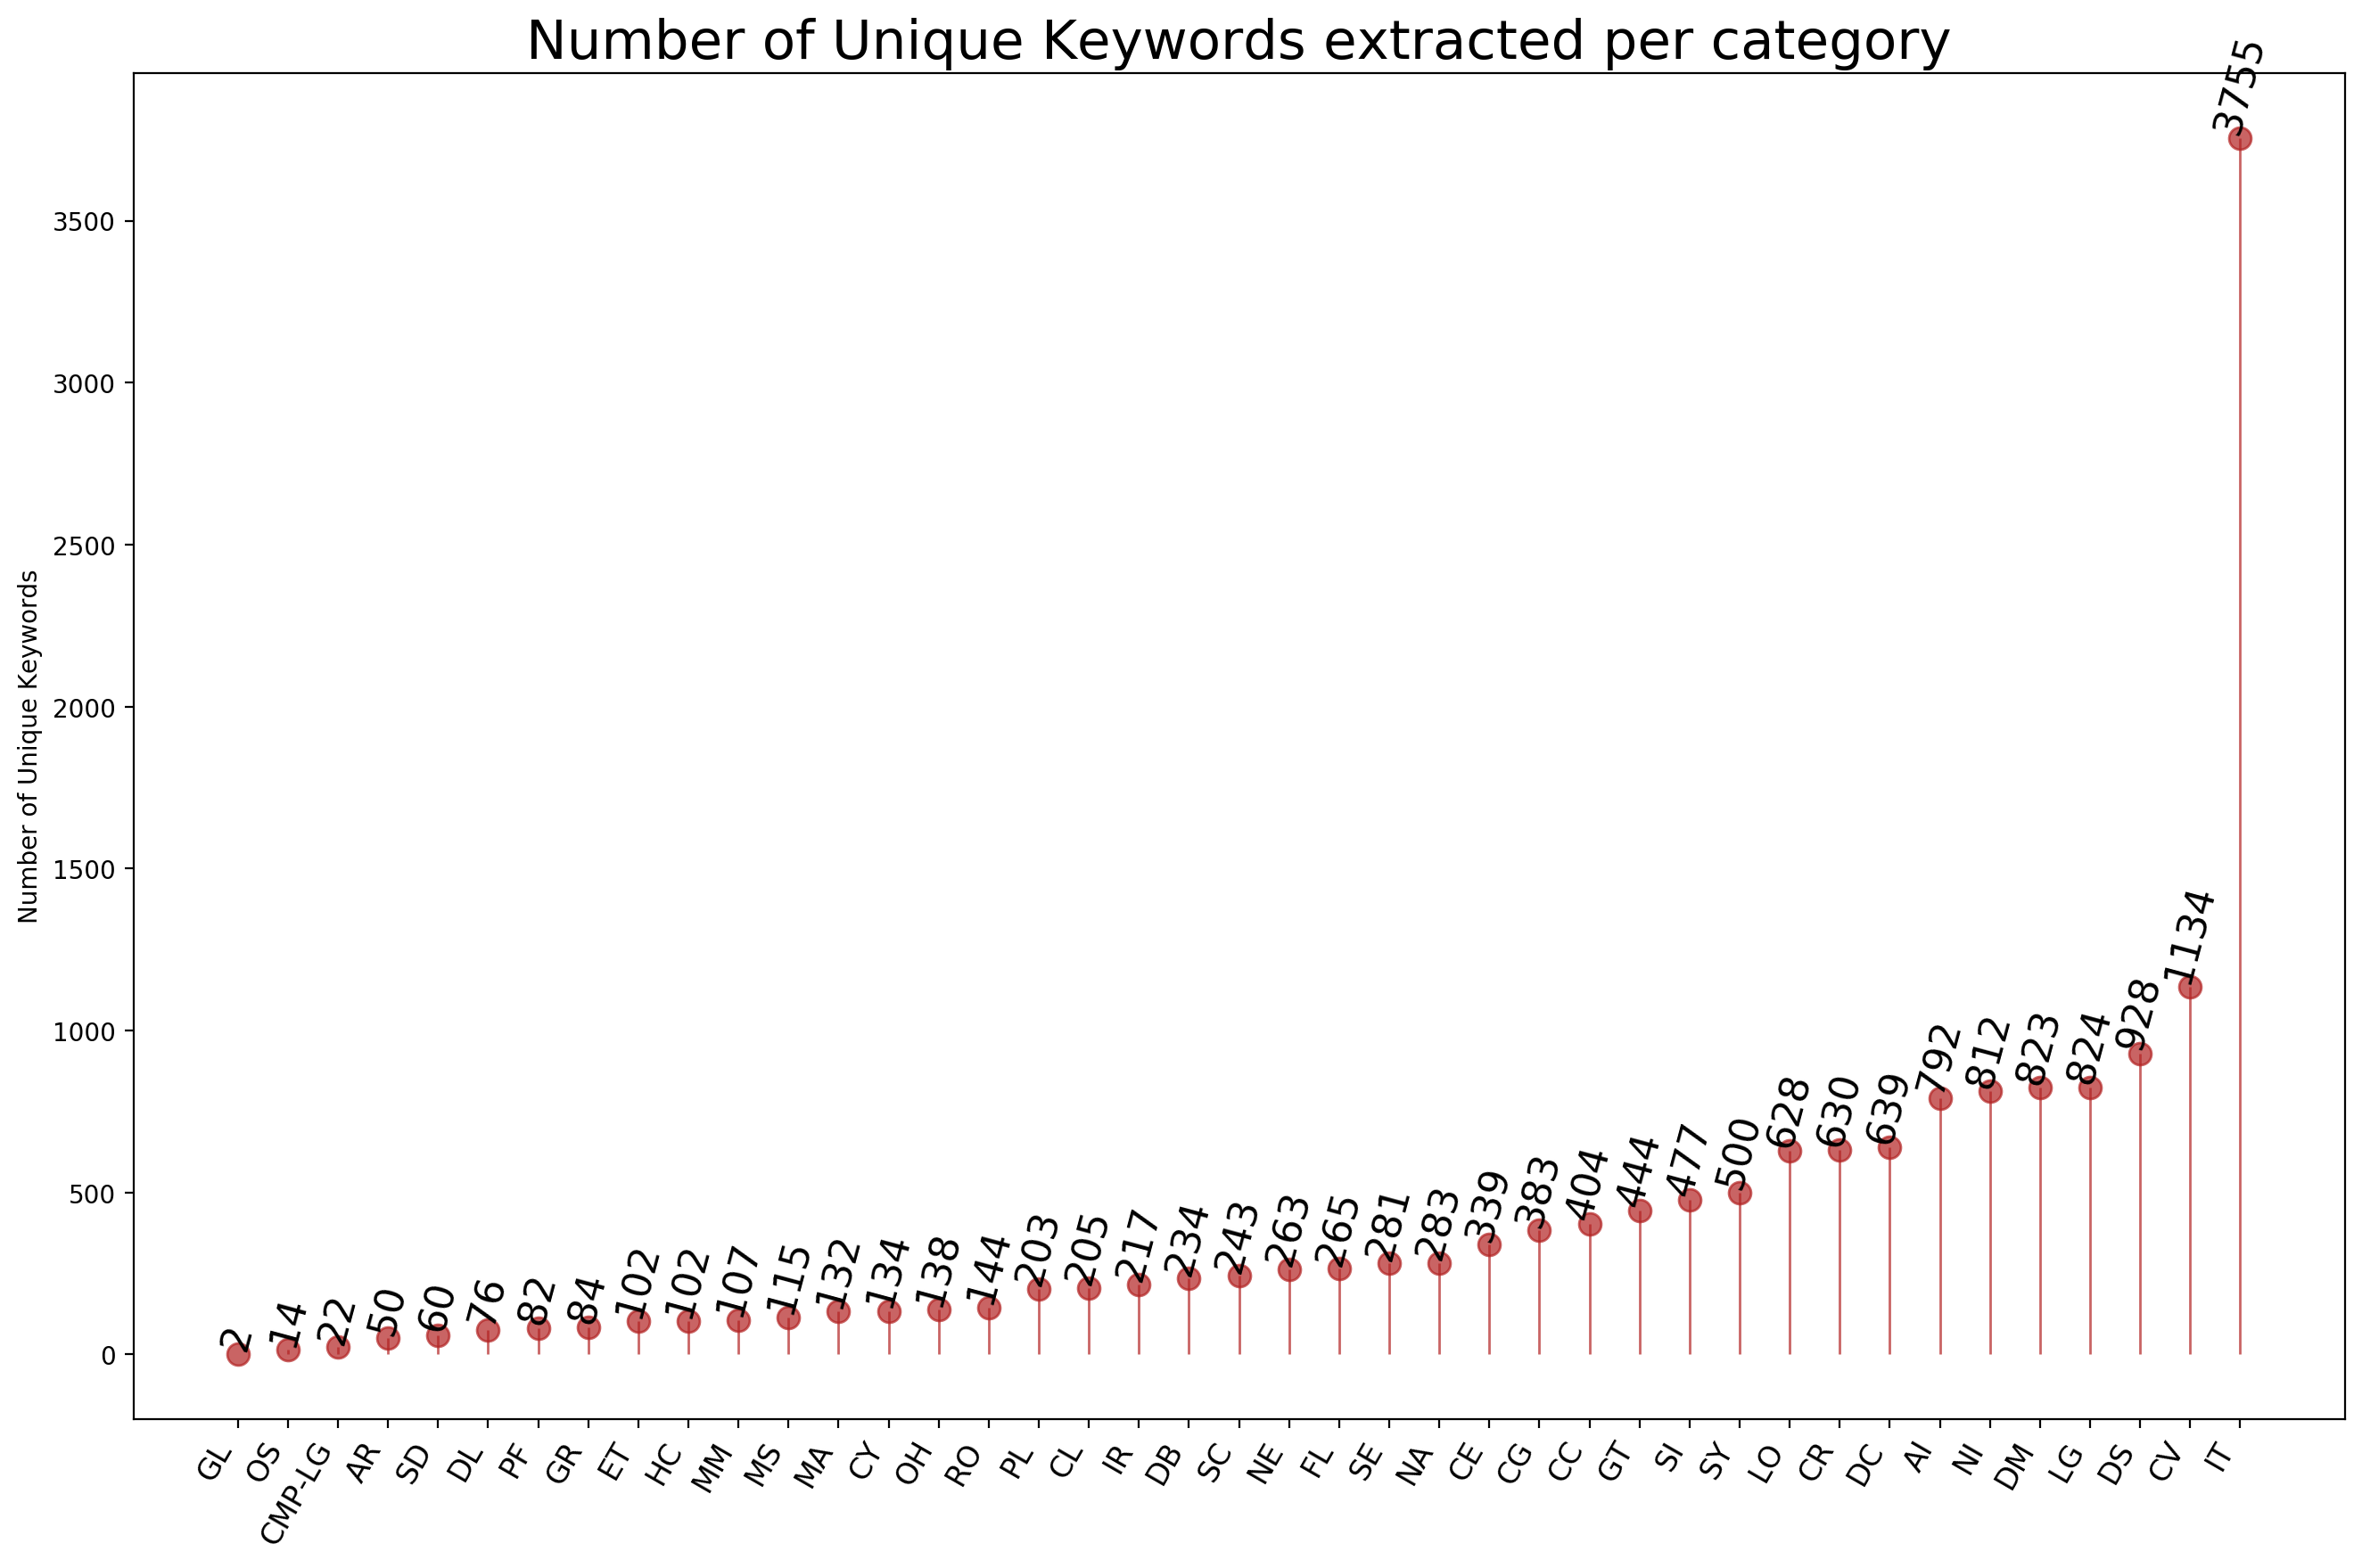

In [4]:
def unique(sequence):
    seen = set()
    unique =  [x for x in sequence if not (x in seen or seen.add(x))]
    unique = [i for i in unique if i.count('_')==1]
    unique_present = []
    for i in unique:
        count = sequence.count(i)
        unique_present.append((i,count))
    return unique_present


all_list = []
all_list_without_count = []
length = []

with open('all_keys_list_sorted.csv', 'w', newline="") as csv_file:  
    writer = csv.writer(csv_file)
    for key, value in keywords_dict.items():
        counts = collections.Counter(value)
        new_list = sorted(value, key=lambda x: -counts[x])
        new_list = unique(new_list)
        keyword_only = [i[0] for i in new_list]
        all_list.append(new_list)
        # all_list_without_count.append(keyword_only)
        length.append(len(new_list))
        writer.writerow([key, keyword_only])
keywords_df = pd.DataFrame(all_list)
keywords_df = keywords_df.transpose()
keywords_df.columns = keywords_dict.keys()
keywords_df.to_csv("arxiv_keywords_phrase.csv")


df = pd.DataFrame(list(zip(keywords_dict.keys(), length)), 
               columns =['Topic', 'Keywords_num']) 

df.sort_values('Keywords_num', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 200)
ax.vlines(x=df.index, ymin=0, ymax=df.Keywords_num, color='firebrick', alpha=0.7, linewidth=1)
ax.scatter(x=df.index, y=df.Keywords_num, s=80, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Number of Unique Keywords extracted per category', fontdict={'size':22})
ax.set_ylabel('Number of Unique Keywords')
ax.set_xticks(df.index)
ax.set_xticklabels(df.Topic.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
# ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.Keywords_num+.5, s=round(row.Keywords_num, 2), rotation=75, horizontalalignment= 'center', verticalalignment='bottom', fontsize=16)

plt.savefig("Keywords_per_cat.jpg")
plt.show()

## This part of the code collects the reference information for all papers and saves the link between papers  

In [6]:
entity_to_id = {}
relation_to_id = {}
paper_set = set()
for key, cat, num in all_keywords:
    for k in key:
        keyword_set.add(k)
    paper_set.add(num)

# for i in fullform_map.keys():
#     keyword_set.add(i)

keyword_set.add("computer_science")
keyword_set = keyword_set.union(paper_set)
for idx, x in enumerate(keyword_set):
    entity_to_id[x] = idx

reference_list = []
with open("/home/jayanth/Windsor/Thesis/Thesis_code/data/ArXiv/ArXiv_data/ArXivref.txt","r") as file:
    for idx,line in enumerate(file):
        inner = []
        line = line.split()
        for i in line:
            j = i.replace(":",".")
            if j in paper_set:
                inner.append(j)
        reference_list.append(inner)

with open("/home/jayanth/Windsor/Thesis/Thesis_code/data/ArXiv/ArXiv_data/ArXivref_CS.txt","w") as file:
    for i in reference_list:
        if len(i)>1:
            for j in i:
                file.write(str(j)+"\t")
            file.write("\n")


reference = []
with open("/home/jayanth/Windsor/Thesis/Thesis_code/data/ArXiv/ArXiv_data/ArXivref_CS.txt", "r") as file:
    for i in file:
        reference.append(i)

### Following code generate triples for training the TransE algorithm

itertools combinations is used to create pairwise combination of all the entities which are linked with a relation <br>
They are converted to their respective id's for TransE algorithm to process it further

In [15]:
triple = []
def get_triple(all_key):
    for key, cat, num in all_key:
        all_comb = combinations(key, 2)
        for i, j in all_comb:
            triple.append([i, j, "same_paper"])
        for k in key:
            triple.append([k, cat, "keyword_in"])
            triple.append([num, k, "paper_keyword"])
        triple.append([num, cat, "papertopic"])
    for i in all_labels:
        triple.append(["computer_science", i, "subtopic"])
    for i in reference:
        i = i.split()
        for j in i[1:]:
            triple.append([i[0], j, "reference"])


relation_to_id["keyword_in"] = 0
relation_to_id["same_paper"] = 1
relation_to_id["papertopic"] = 2
relation_to_id["subtopic"] = 3
relation_to_id["reference"] = 4
relation_to_id["paper_keyword"] = 5

triple_id = []
def get_triple_id(all_key):
    for key, cat, num in all_key:
        all_comb = combinations(key, 2)
        for i, j in all_comb:
            triple_id.append([entity_to_id[i], entity_to_id[j], relation_to_id["same_paper"]])
        for k in key:
            triple_id.append([entity_to_id[k], entity_to_id[cat], relation_to_id["keyword_in"]])
            triple_id.append([entity_to_id[num], entity_to_id[k], relation_to_id["paper_keyword"]])
        triple_id.append([entity_to_id[num], entity_to_id[cat], relation_to_id["papertopic"]])
    for i in all_labels:
        triple_id.append([entity_to_id["computer_science"], entity_to_id[i], relation_to_id["subtopic"]])
    for i in reference:
        i = i.split()
        for j in i[1:]:
            triple_id.append([entity_to_id[i[0]], entity_to_id[j], relation_to_id["reference"]])


get_triple(all_keywords)
get_triple_id(all_keywords)


for i in triple[0:10]:
    print(i) 
for i in triple_id[0:10]:
    print(i) 

['Self_healing_Systems', 'Fault_Detection', 'same_paper']
['Self_healing_Systems', 'Machine_Learning', 'same_paper']
['Self_healing_Systems', 'Computational_Intelligence', 'same_paper']
['Self_healing_Systems', 'Autonomic_Computing', 'same_paper']
['Self_healing_Systems', 'Artificial_Neural_Networks', 'same_paper']
['Self_healing_Systems', 'Restricted_Boltzmann_Machines', 'same_paper']
['Fault_Detection', 'Machine_Learning', 'same_paper']
['Fault_Detection', 'Computational_Intelligence', 'same_paper']
['Fault_Detection', 'Autonomic_Computing', 'same_paper']
['Fault_Detection', 'Artificial_Neural_Networks', 'same_paper']
[19549, 24527, 1]
[19549, 30669, 1]
[19549, 11467, 1]
[19549, 35665, 1]
[19549, 38122, 1]
[19549, 31359, 1]
[24527, 30669, 1]
[24527, 11467, 1]
[24527, 35665, 1]
[24527, 38122, 1]


## Split the data into test train and validate sets 

These id's are split into treain test and validation sets by using np.split function

In [8]:
triple_id_df = pd.DataFrame(triple_id)
triple_id_df.columns = ["Entity 1", "Entity 2", "Relation"]
validate, train, test = np.split(triple_id_df.sample(frac=1),[int(.1 * len(triple_id_df)), int(.9 * len(triple_id_df))])
print(train.shape[0])
print(test.shape[0])
print(validate.shape[0])
np.savetxt('train2id.txt',train.values,header=str(train.shape[0]),fmt='%s')
np.savetxt('test2id.txt',test.values,header= str(test.shape[0]),fmt='%s')
np.savetxt('valid2id.txt',validate.values,header=str(validate.shape[0]),fmt='%s')


with open("relation2id.txt","w") as file:
    file.write(str(len(relation_to_id.keys()))+"\n")
    for i in relation_to_id.keys():
        file.write(i+"\t"+str(relation_to_id[i])+"\n")

with open("entity2id.txt","w") as file:
    file.write(str(len(entity_to_id.keys()))+"\n")
    for i in entity_to_id.keys():
        file.write(i+"\t"+str(entity_to_id[i])+"\n")

with open("triple.txt","w") as file:
    file.write(str(len(triple))+"\n")
    for i in triple:
        for j in i:
            file.write(j+"\t")
        file.write("\n")

with open("triple2id.txt","w") as file:
    file.write(str(len(triple_id))+"\n")
    for i in triple_id:
        for j in i:
            file.write(str(j)+"\t")
        file.write("\n")

186785
23349
23348


Plot the number of papers per category 

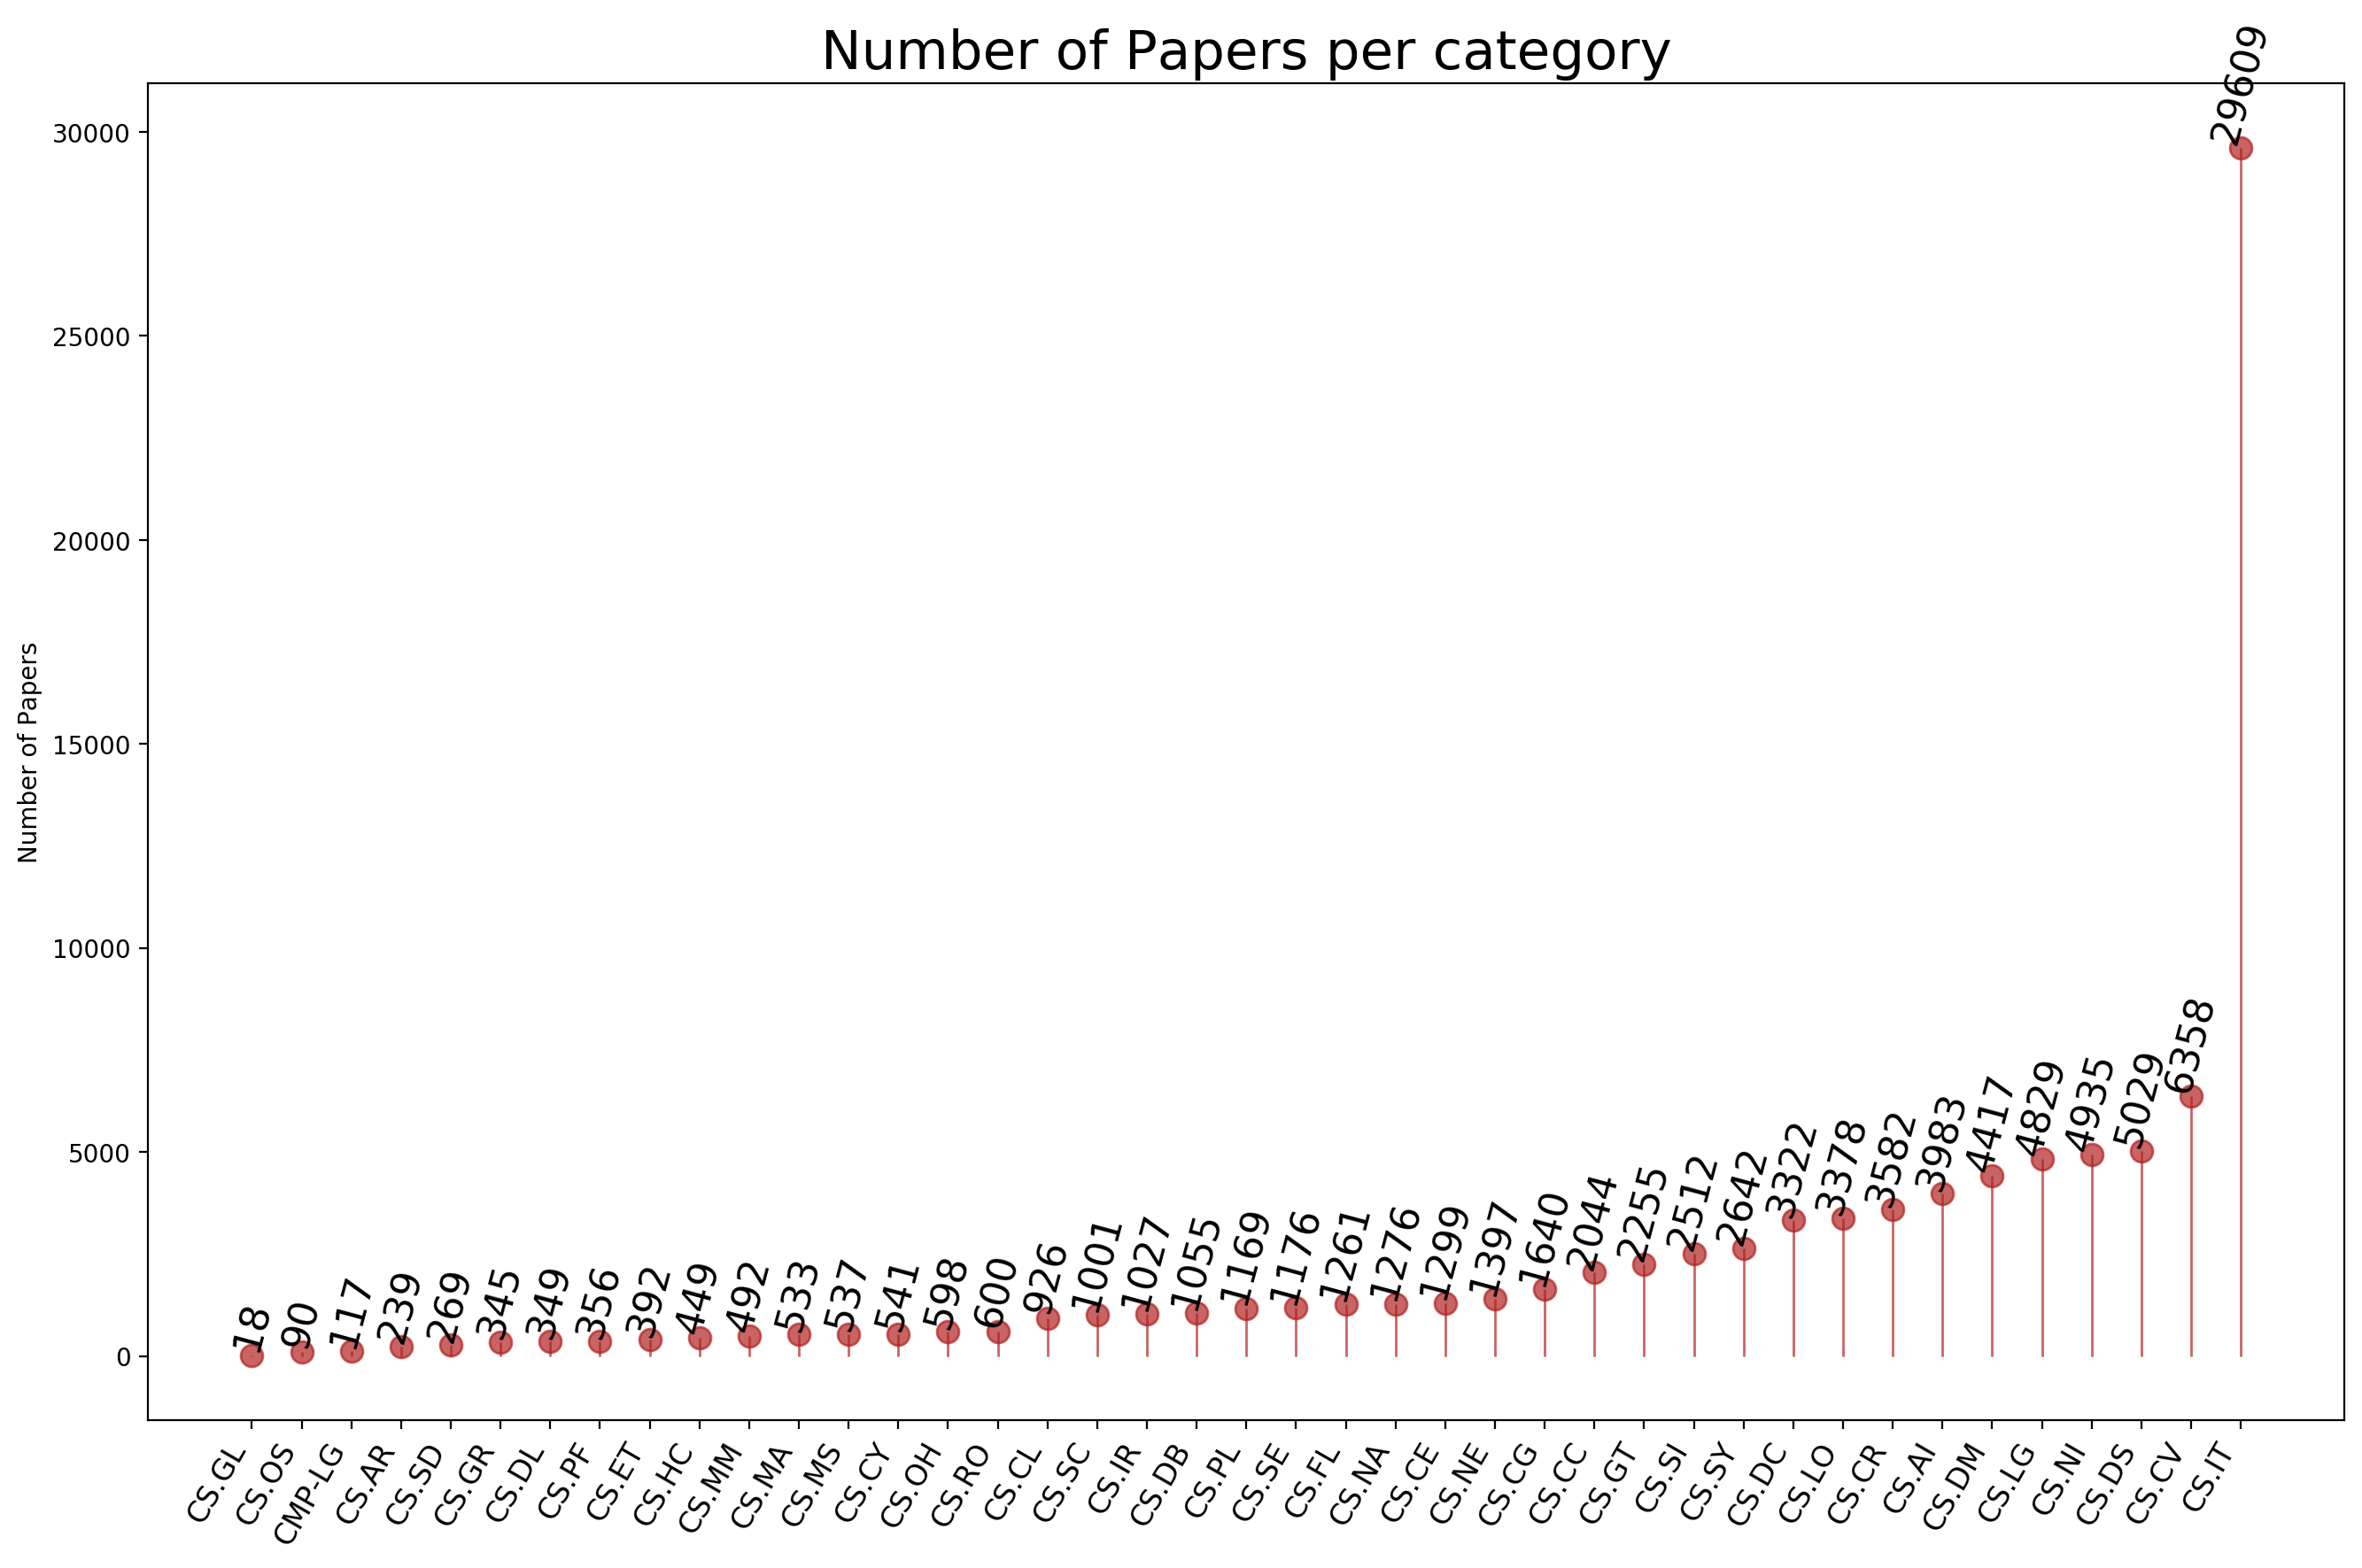

In [10]:
df.sort_values('Keywords_num', inplace=True)
df.reset_index(inplace=True)

paper_cat = defaultdict(list)
for keywords in all_keywords:
    paper_cat[keywords[1]].extend(keywords[2])

x = []
y = []
for i in paper_cat:
    x.append(i)
    y.append(len(paper_cat[i]))


df = pd.DataFrame(list(zip(x, y)),columns =['Topic', 'Paper_num']) 
df.sort_values('Paper_num', inplace=True)
df.reset_index(inplace=True)
topics = df.Topic
df["Names"] = topics
df.to_latex("num_papers")

# # Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 200)
ax.vlines(x=df.index, ymin=0, ymax=df.Paper_num, color='firebrick', alpha=0.7, linewidth=1)
ax.scatter(x=df.index, y=df.Paper_num, s=80, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Number of Papers per category', fontdict={'size':22})
ax.set_ylabel('Number of Papers')
ax.set_xticks(df.index)
ax.set_xticklabels(df.Topic.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
# ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.Paper_num+.5, s=round(row.Paper_num, 2), rotation=75, horizontalalignment= 'center', verticalalignment='bottom', fontsize=16)

plt.savefig("Papers_per_cat.jpg")
plt.show()

Plot of the degree distribution of knowledge graph

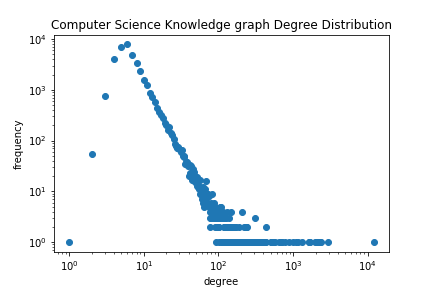

In [11]:
G = nx.from_pandas_edgelist(triple_id_df, "Entity 1", "Entity 2", "Relation", create_using=nx.DiGraph())
nx.draw(G)
plt.show()

N, K = G.order(), G.size()
avg_deg = float(K) / N
print("Nodes: ", N)
print("Edges: ", K)
print("mean degree: ", avg_deg)

# print(page_rank)
page_rank = nx.pagerank(G)
deg_dist = nx.degree_histogram(G)
plt.loglog(range(0, len(deg_dist)), deg_dist, 'o')
plt.xlabel('degree')
plt.ylabel('frequency')
plt.title("Computer Science Knowledge graph Degree Distribution")
plt.savefig("CS_KG_Degreedist.png")
plt.show()
plt.close()

Plot of indegree and out degree 

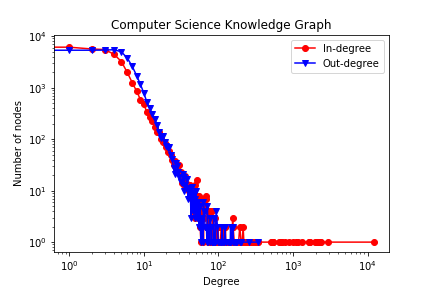

In [12]:
in_degrees = G.in_degree() # dictionary node:degree
in_degrees = dict(in_degrees)
in_values = sorted(set(in_degrees.values()))
in_hist = [list(in_degrees.values()).count(x) for x in in_values]
out_degrees = G.out_degree() # dictionary node:degree
out_degrees = dict(out_degrees)
out_values = sorted(set(out_degrees.values()))
out_hist = [list(out_degrees.values()).count(x) for x in out_values]
plt.figure()
plt.loglog(in_values,in_hist,'ro-') # in-degree
plt.loglog(out_values,out_hist,'bv-') # out-degree
plt.legend(['In-degree','Out-degree'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Computer Science Knowledge Graph')
plt.savefig('Computer_Science_Knowledge_Graph.png')
plt.close()